# A10: Logistic Regression

In [73]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Logistic Regression functions

In [74]:
def binary_cross_entropy_loss(Y_true, Y_pred):
    # formula of binary cross entropy loss
    SUM = np.sum(Y_true * np.log10(Y_pred) + (1-Y_true) * np.log10(1-Y_pred))
    return -SUM/Y_true.shape[0]

def sigmoid(z): # return numpy array with element wise operations
    return 1/(1+np.exp(-z))

def normalize_features(X):
    
    sum = np.sum(X,axis=0)
    sum = sum / X.shape[0]
    X = X - sum # mean = 0
    standard_deviation = np.sqrt(np.sum(np.square(X),axis=0)/X.shape[0])
    return X / standard_deviation # variance = 0

def fit_logistic_regression(X, y, learning_rate, num_epochs):
    # initialize weights and bias
    weights = (np.random.rand(X.shape[1])-0.5)
    bias  = (np.random.rand(1)-0.5)

    for epoch in range(num_epochs):
        # get prediction
        pred = sigmoid(X.dot(weights) + bias) 
        # get gradients wrt weights and bias
        grad = np.matmul(X.T,(y/pred - (1-y)/(1-pred)) * (pred * (1-pred))) * (-1/X.shape[0])
        bias_grad = np.sum(((y/pred - (1-y)/(1-pred)) * (pred * (1-pred))) * (-1/X.shape[0]))
        #update weights and bias
        weights = weights - grad * learning_rate
        bias = bias - bias_grad * learning_rate
        print(f"epoch {epoch + 1} training loss : {binary_cross_entropy_loss(y,pred)}")
    train_pred = predict(X,weights,bias,threshold=0.5)
    return weights,bias


def predict(X, weights, bias, threshold=0.5):
    Y = sigmoid(X.dot(weights) + bias)
    Y = np.where(Y < 0.5,0,1)
    return Y


### Evaluation Functions

In [75]:
def evaluate_metrics(y_true, y_pred):
    print(f"Acrruacy score : {accuracy_score(y_true,y_pred)}")
    print(f"Presicion score : {precision_score(y_true,y_pred)}")
    print(f"Recall_score : {recall_score(y_true,y_pred)}")
    print(f"F1_score : {f1_score(y_true,y_pred)}")


def plot_roc_curve(Y_true, Y_scores):
    fpr,tpr,thresholds = roc_curve(Y_true,Y_scores)
    area = auc(fpr,tpr)
    plt.plot([0,1],[0,1],linestyle='-.',color = 'g')
    plt.plot(fpr,tpr)
    plt.figtext(0.7,0.3,f"AUC : {round(area,2)}",size = 'large')
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    flag = 0
    for i in range(y_pred.shape[0]):
        flag+=1
        if(y_pred[i] == 0 and y_true[i] == 0):
            TN += 1
            
        if(y_pred[i] == 0 and y_true[i] == 1):
            FN += 1
         
        if(y_pred[i] == 1 and y_true[i] == 0):
            FP += 1
           
        if(y_pred[i] == 1 and y_true[i] == 1):
            TP += 1
  

    y_labels = ["Label Positive","Label Negative"]
    x_labels = ["Pediction Positive","Pediction Negative"]

    # confusion matrix
    cf_values = np.array([[TP,FN],[FP,TN]])
    cf_text = [[f"TP\n{TP}",f"FN\n{FN}"],[f"FP\n{FP}",f"TN\n{TN}"]]

    # heatmap using imshow
    fig, ax = plt.subplots()
    im = ax.imshow(cf_values)
    
    ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
    ax.set_yticks(np.arange(len(y_labels)), labels=y_labels)
    ax.xaxis.tick_top()

    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, cf_text[i][j],
                           ha="center", va="center", color="w",fontsize = 25)
            text.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')])
    
    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.show()

epoch 1 training loss : 0.398347777098726
epoch 2 training loss : 0.3859141044481591
epoch 3 training loss : 0.37412973638767993
epoch 4 training loss : 0.36297838406284993
epoch 5 training loss : 0.35244097313258554
epoch 6 training loss : 0.34249605372499
epoch 7 training loss : 0.33312024531739265
epoch 8 training loss : 0.3242886951776689
epoch 9 training loss : 0.31597553048700044
epoch 10 training loss : 0.30815428712724996

Test metrics
----------------------------------------------------------
Acrruacy score : 0.56
Presicion score : 1.0
Recall_score : 0.3888888888888889
F1_score : 0.56


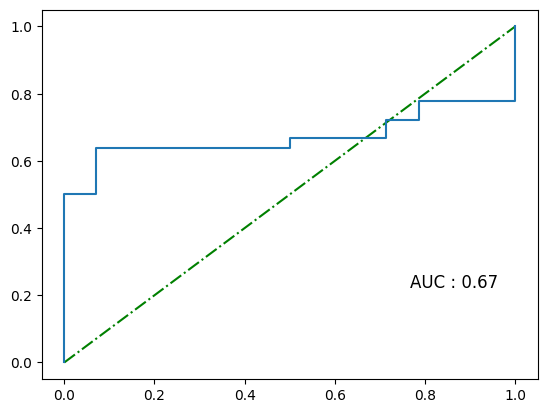

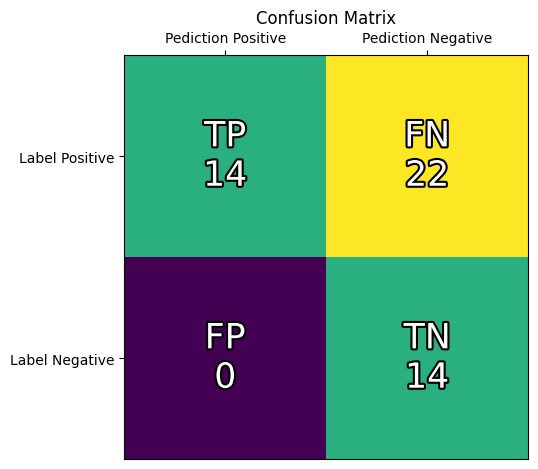

In [76]:
def main():
    data_train = pd.read_csv('train.csv')
    data_test = pd.read_csv('test.csv')
    
    # Extract features and labels
    X_train = data_train[['Gender', 'Age', 'EstimatedSalary']].values
    y_train = data_train['Purchased'].values
    X_test = data_test[['Gender', 'Age', 'EstimatedSalary']].values
    y_test = data_test['Purchased'].values

    X_train[:,0] = np.where(X_train[:,0] == "Male",1.0,0.0)
    X_test[:,0] = np.where(X_test[:,0] == "Male",1.0,0.0)

    X_train = X_train.astype(float)
    X_test = X_test.astype(float)
    
    # Normalize the features and handle categorical data
    X_train = normalize_features(X_train)
    X_test = normalize_features(X_test)
    

    # Train logistic regression model
    learning_rate = 0.1
    num_epochs = 10
    weights, bias = fit_logistic_regression(X_train, y_train, learning_rate, num_epochs)

    # Make predictions on the test set
    y_pred_test = predict(X_test, weights, bias)
    
    # Calculate and print evaluation metrics
    print("")
    print("Test metrics")
    print("----------------------------------------------------------")
    evaluate_metrics(y_test, y_pred_test)
    
    # Generate and plot ROC curve
    y_scores = sigmoid(np.dot(X_test, weights) + bias)  # Calculate probabilities for ROC
    plot_roc_curve(y_test, y_scores)
    
    # Generate and plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_test)

# Run the main function
if __name__ == "__main__":
    main()
